In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
X = pd.read_csv("data/X_dev.csv")
y = pd.read_csv("data/y_dev.csv").squeeze()

In [28]:
X.head()

,concentration,distance,voltage,flow_rate
0,10,15.0,20.0,0.3
1,12,15.0,20.0,0.3
2,8,15.0,25.0,0.2
3,12,15.0,20.0,0.4
4,10,12.5,22.5,0.3


In [29]:
y.head()

0    281.82
1    310.06
2    202.62
3    312.15
4    263.70
Name: diameter, dtype: float64

In [30]:
param_grids = {
    "Linear Regression": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ]),
        {}  # no hyperparameters for LR
    ),

    "Ridge Regression": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', Ridge())
        ]),
        {
            'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    ),

    "Lasso Regression": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', Lasso(max_iter=5000))
        ]),
        {
            'model__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
        }
    ),

    "ElasticNet": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', ElasticNet(max_iter=5000))
        ]),
        {
            'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
            'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        }
    ),

    # Tree-based models (no scaler)
    "Decision Tree": (
        DecisionTreeRegressor(),
        {
            "max_depth": [3, 5, 7, 10, 15, None],
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 4, 8]
        }
    ),

    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200, 300, 500],
            "max_depth": [None, 5, 10, 15, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2", None]
        }
    ),

    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200, 300],
            "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    ),

    "AdaBoost": (
        AdaBoostRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200, 300],
            "learning_rate": [0.001, 0.01, 0.05, 0.1, 1]
        }
    ),

    "KNN": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', KNeighborsRegressor())
        ]),
        {
            'model__n_neighbors': [3, 5, 7, 9, 11, 15],
            'model__weights': ["uniform", "distance"],
            'model__p': [1, 2]
        }
    ),

    "MLP Regressor": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', MLPRegressor(random_state=42, max_iter=2000))
        ]),
        {
            'model__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100), (150, 100)],
            'model__activation': ["relu", "tanh", "logistic"],
            'model__alpha': [0.0001, 0.001, 0.01, 0.1],
            'model__learning_rate': ["constant", "adaptive"]
        }
    ),

    "XGBoost": (
        XGBRegressor(random_state=42, objective="reg:squarederror"),
        {
            "n_estimators": [50, 100, 200, 300, 500],
            "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7, 10],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0]
        }
    )
}


🔁 Nested CV with visualization: Linear Regression

▶ OUTER FOLD 1
✅ Best Params: {}

▶ OUTER FOLD 2
✅ Best Params: {}

▶ OUTER FOLD 3
✅ Best Params: {}

▶ OUTER FOLD 4
✅ Best Params: {}

▶ OUTER FOLD 5
✅ Best Params: {}


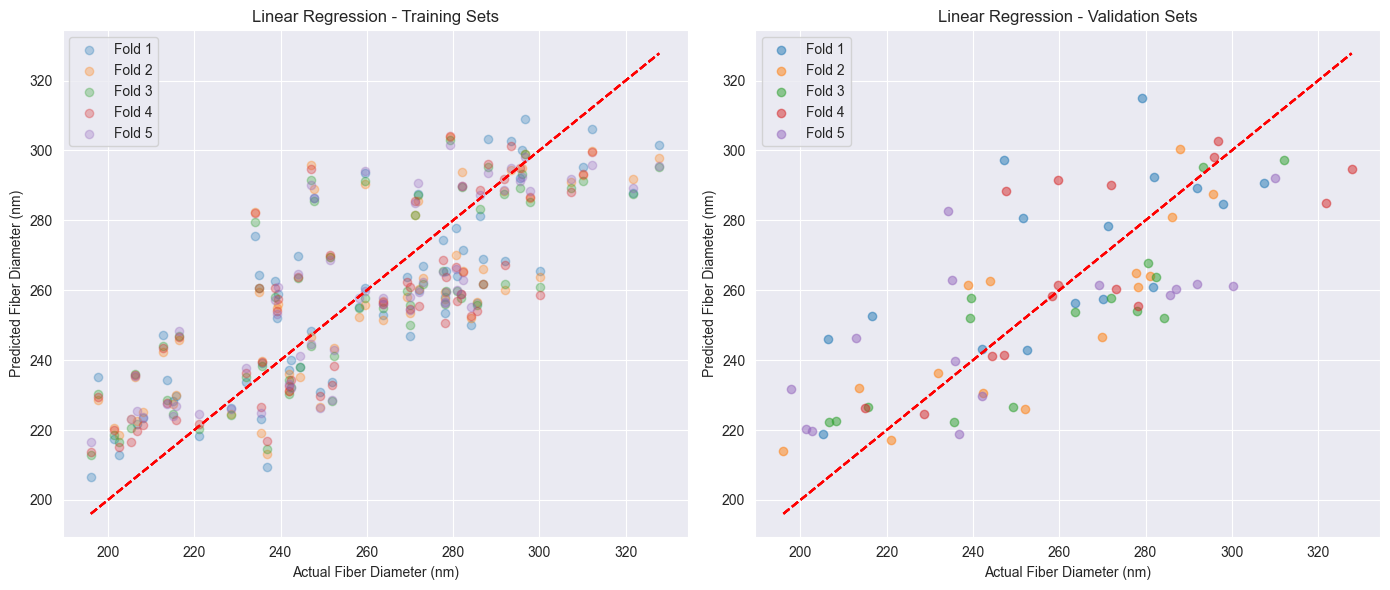


📊 Linear Regression FINAL RESULTS:
RMSE (val): 20.9164 ± 4.0026
MAE  (val): 17.8237
R²   (val): 0.5618

🔁 Nested CV with visualization: Ridge Regression

▶ OUTER FOLD 1
✅ Best Params: {'model__alpha': 1}

▶ OUTER FOLD 2
✅ Best Params: {'model__alpha': 1}

▶ OUTER FOLD 3
✅ Best Params: {'model__alpha': 1}

▶ OUTER FOLD 4
✅ Best Params: {'model__alpha': 10}

▶ OUTER FOLD 5
✅ Best Params: {'model__alpha': 10}


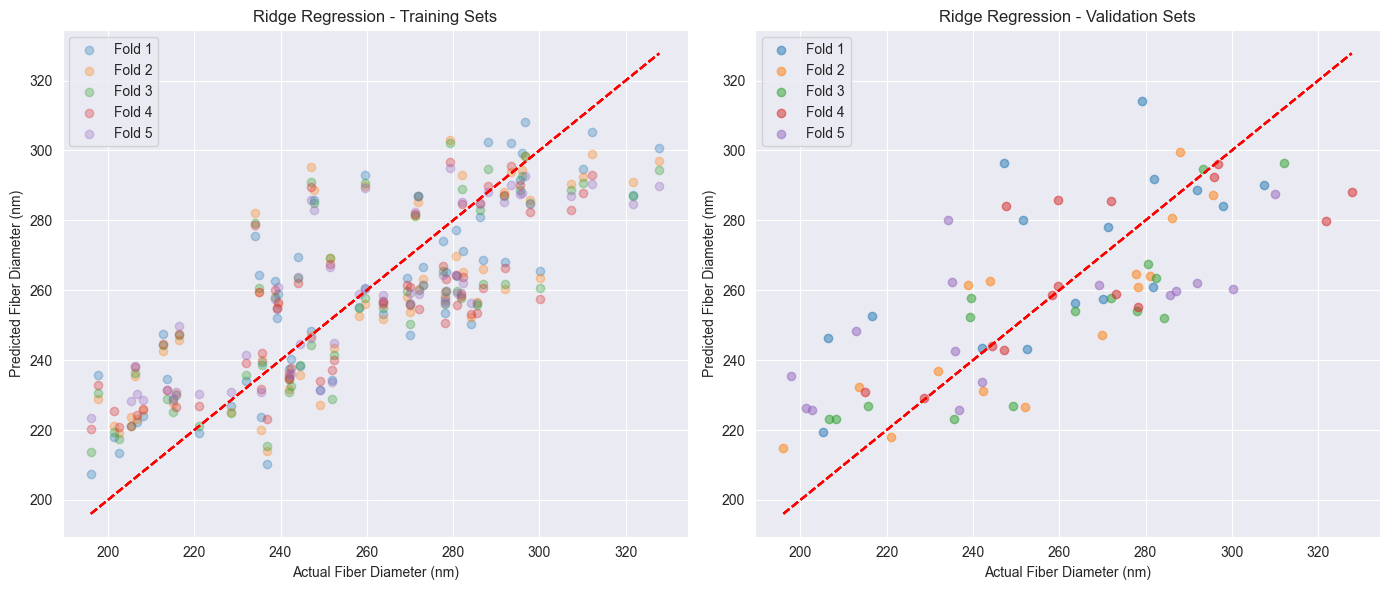


📊 Ridge Regression FINAL RESULTS:
RMSE (val): 21.0982 ± 4.2323
MAE  (val): 17.8699
R²   (val): 0.5548

🔁 Nested CV with visualization: Lasso Regression

▶ OUTER FOLD 1
✅ Best Params: {'model__alpha': 1}

▶ OUTER FOLD 2
✅ Best Params: {'model__alpha': 1}

▶ OUTER FOLD 3
✅ Best Params: {'model__alpha': 1}

▶ OUTER FOLD 4
✅ Best Params: {'model__alpha': 1}

▶ OUTER FOLD 5
✅ Best Params: {'model__alpha': 1}


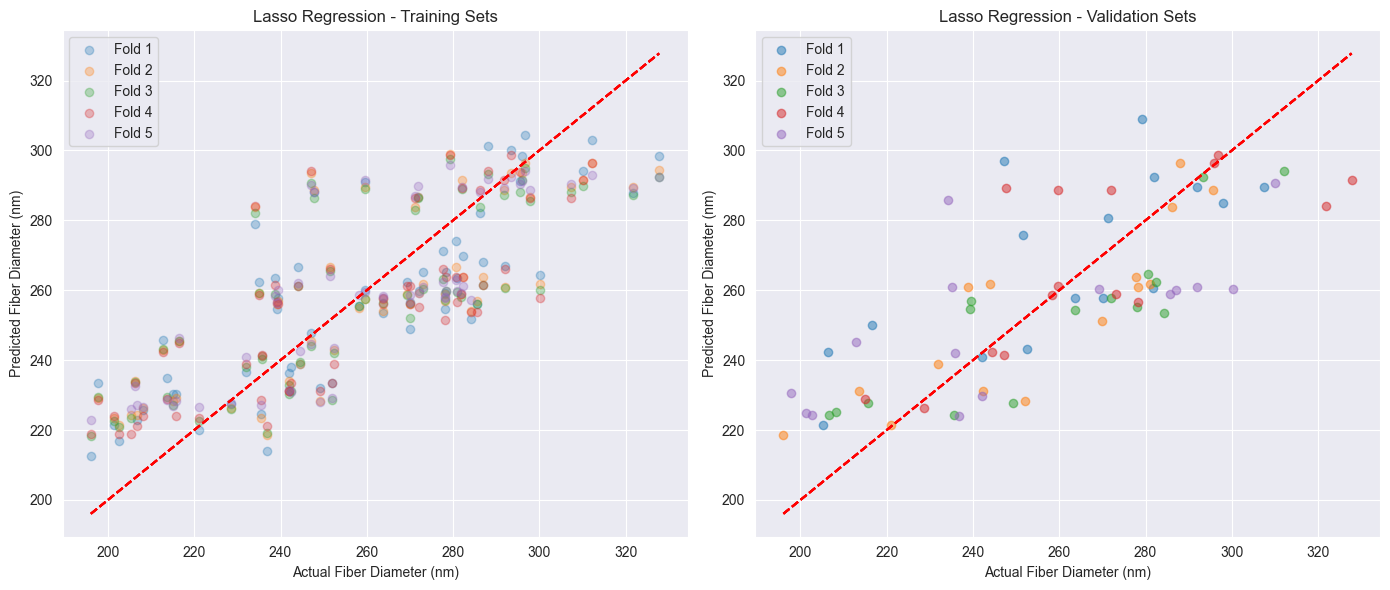


📊 Lasso Regression FINAL RESULTS:
RMSE (val): 20.7802 ± 4.1002
MAE  (val): 17.6689
R²   (val): 0.5701

🔁 Nested CV with visualization: ElasticNet

▶ OUTER FOLD 1
✅ Best Params: {'model__alpha': 1, 'model__l1_ratio': 0.9}

▶ OUTER FOLD 2
✅ Best Params: {'model__alpha': 1, 'model__l1_ratio': 0.9}

▶ OUTER FOLD 3
✅ Best Params: {'model__alpha': 1, 'model__l1_ratio': 0.9}

▶ OUTER FOLD 4
✅ Best Params: {'model__alpha': 1, 'model__l1_ratio': 0.7}

▶ OUTER FOLD 5
✅ Best Params: {'model__alpha': 1, 'model__l1_ratio': 0.7}


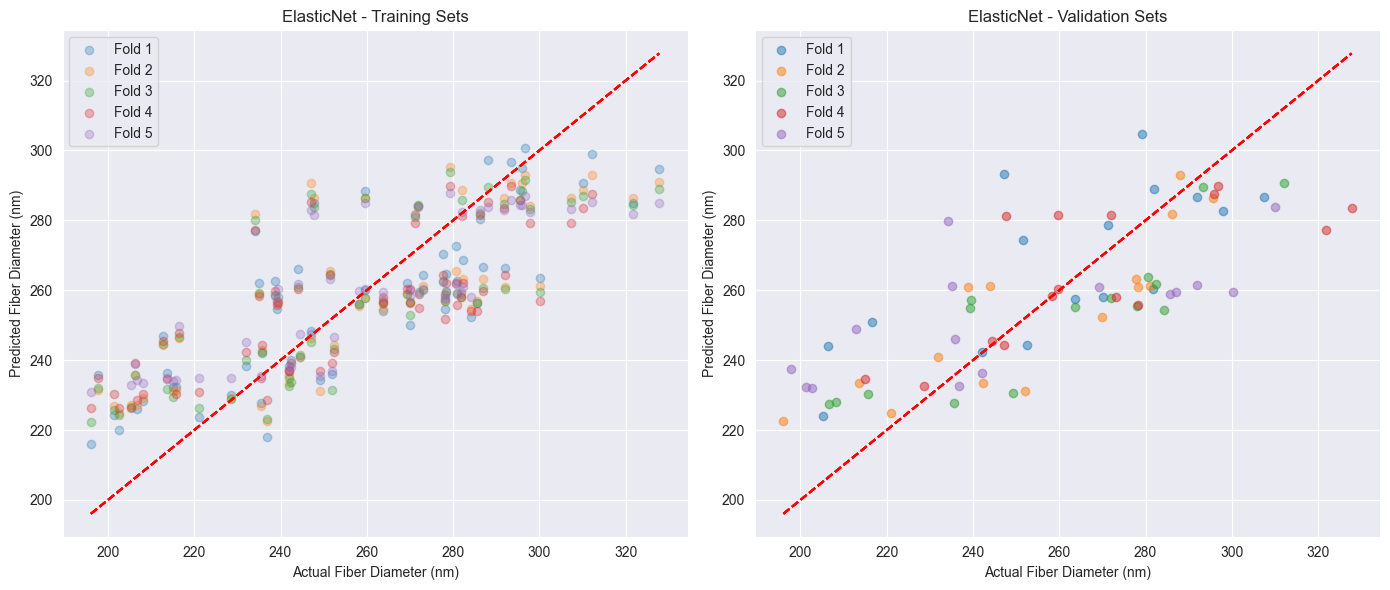


📊 ElasticNet FINAL RESULTS:
RMSE (val): 21.2639 ± 4.3788
MAE  (val): 18.1792
R²   (val): 0.5512

🔁 Nested CV with visualization: Decision Tree

▶ OUTER FOLD 1
✅ Best Params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}

▶ OUTER FOLD 2
✅ Best Params: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}

▶ OUTER FOLD 3
✅ Best Params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

▶ OUTER FOLD 4
✅ Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

▶ OUTER FOLD 5
✅ Best Params: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 5}


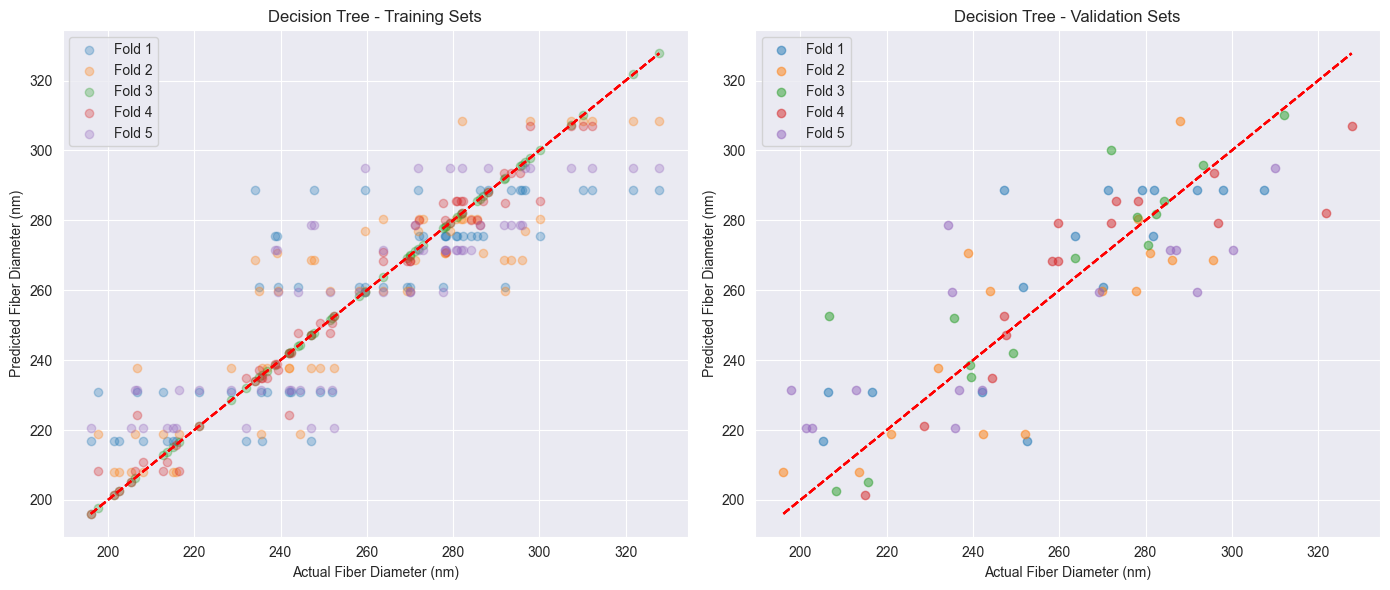


📊 Decision Tree FINAL RESULTS:
RMSE (val): 17.9853 ± 2.7390
MAE  (val): 14.5169
R²   (val): 0.6777

🔁 Nested CV with visualization: Random Forest

▶ OUTER FOLD 1
✅ Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

▶ OUTER FOLD 2
✅ Best Params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

▶ OUTER FOLD 3
✅ Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

▶ OUTER FOLD 4
✅ Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

▶ OUTER FOLD 5
✅ Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


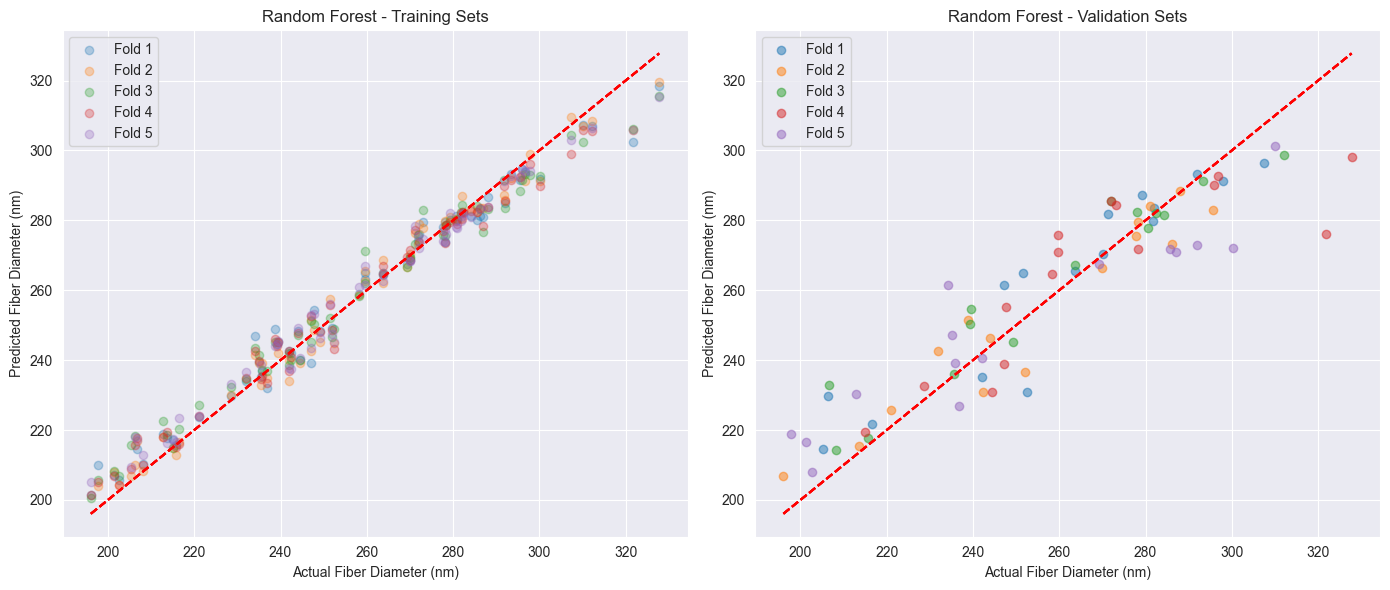


📊 Random Forest FINAL RESULTS:
RMSE (val): 12.4226 ± 3.1658
MAE  (val): 9.7808
R²   (val): 0.8413

🔁 Nested CV with visualization: Gradient Boosting

▶ OUTER FOLD 1
✅ Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

▶ OUTER FOLD 2
✅ Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

▶ OUTER FOLD 3
✅ Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

▶ OUTER FOLD 4
✅ Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

▶ OUTER FOLD 5
✅ Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


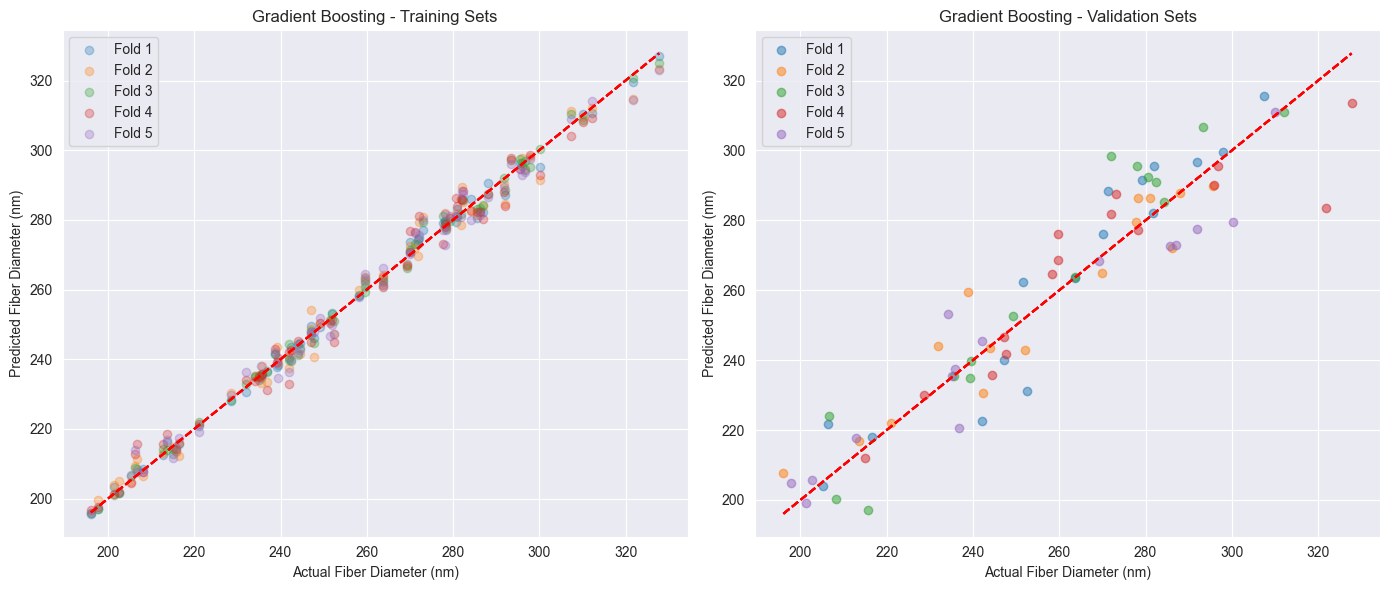


📊 Gradient Boosting FINAL RESULTS:
RMSE (val): 11.2349 ± 1.2312
MAE  (val): 8.4428
R²   (val): 0.8714

🔁 Nested CV with visualization: AdaBoost

▶ OUTER FOLD 1
✅ Best Params: {'learning_rate': 1, 'n_estimators': 300}

▶ OUTER FOLD 2
✅ Best Params: {'learning_rate': 0.1, 'n_estimators': 100}

▶ OUTER FOLD 3
✅ Best Params: {'learning_rate': 0.1, 'n_estimators': 300}

▶ OUTER FOLD 4
✅ Best Params: {'learning_rate': 1, 'n_estimators': 300}

▶ OUTER FOLD 5
✅ Best Params: {'learning_rate': 0.1, 'n_estimators': 300}


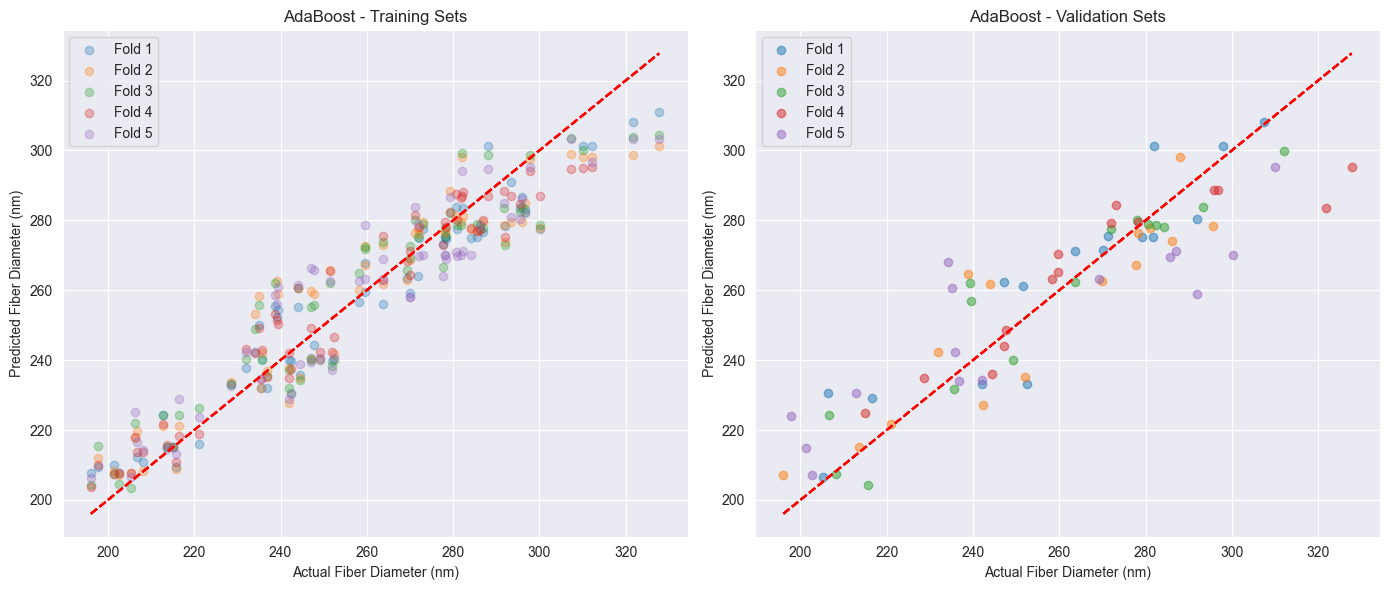


📊 AdaBoost FINAL RESULTS:
RMSE (val): 13.9103 ± 3.2323
MAE  (val): 11.1596
R²   (val): 0.8073

🔁 Nested CV with visualization: KNN

▶ OUTER FOLD 1
✅ Best Params: {'model__n_neighbors': 5, 'model__p': 2, 'model__weights': 'distance'}

▶ OUTER FOLD 2
✅ Best Params: {'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'distance'}

▶ OUTER FOLD 3
✅ Best Params: {'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}

▶ OUTER FOLD 4
✅ Best Params: {'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}

▶ OUTER FOLD 5
✅ Best Params: {'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}


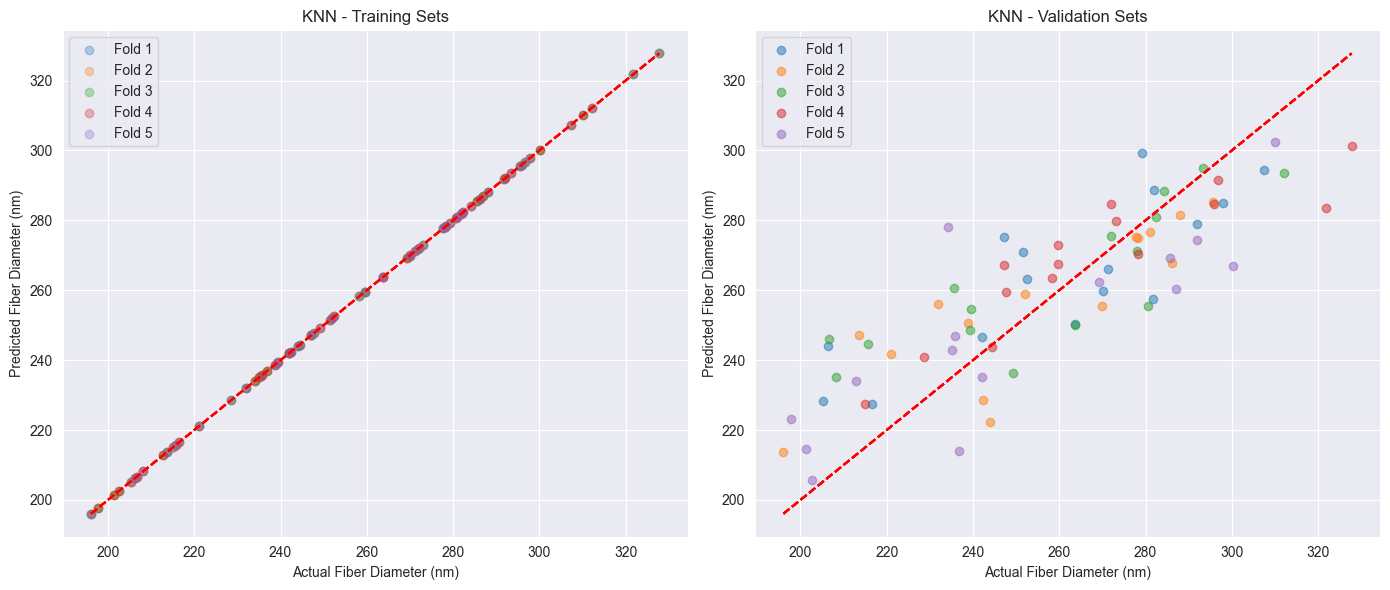


📊 KNN FINAL RESULTS:
RMSE (val): 18.0195 ± 1.8456
MAE  (val): 15.1675
R²   (val): 0.6776

🔁 Nested CV with visualization: MLP Regressor

▶ OUTER FOLD 1


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: Conv

✅ Best Params: {'model__activation': 'relu', 'model__alpha': 0.1, 'model__hidden_layer_sizes': (100, 100), 'model__learning_rate': 'constant'}


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



▶ OUTER FOLD 2


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: Conv

✅ Best Params: {'model__activation': 'relu', 'model__alpha': 0.1, 'model__hidden_layer_sizes': (100, 50), 'model__learning_rate': 'constant'}


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



▶ OUTER FOLD 3


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: Conv

✅ Best Params: {'model__activation': 'relu', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (100, 50), 'model__learning_rate': 'constant'}


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



▶ OUTER FOLD 4


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: Conv

✅ Best Params: {'model__activation': 'relu', 'model__alpha': 0.1, 'model__hidden_layer_sizes': (150, 100), 'model__learning_rate': 'constant'}


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



▶ OUTER FOLD 5


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: Conv

✅ Best Params: {'model__activation': 'relu', 'model__alpha': 0.01, 'model__hidden_layer_sizes': (100, 100), 'model__learning_rate': 'constant'}


/Users/mehrabmahdian/projects/cogni-e-spin-inverse-design/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


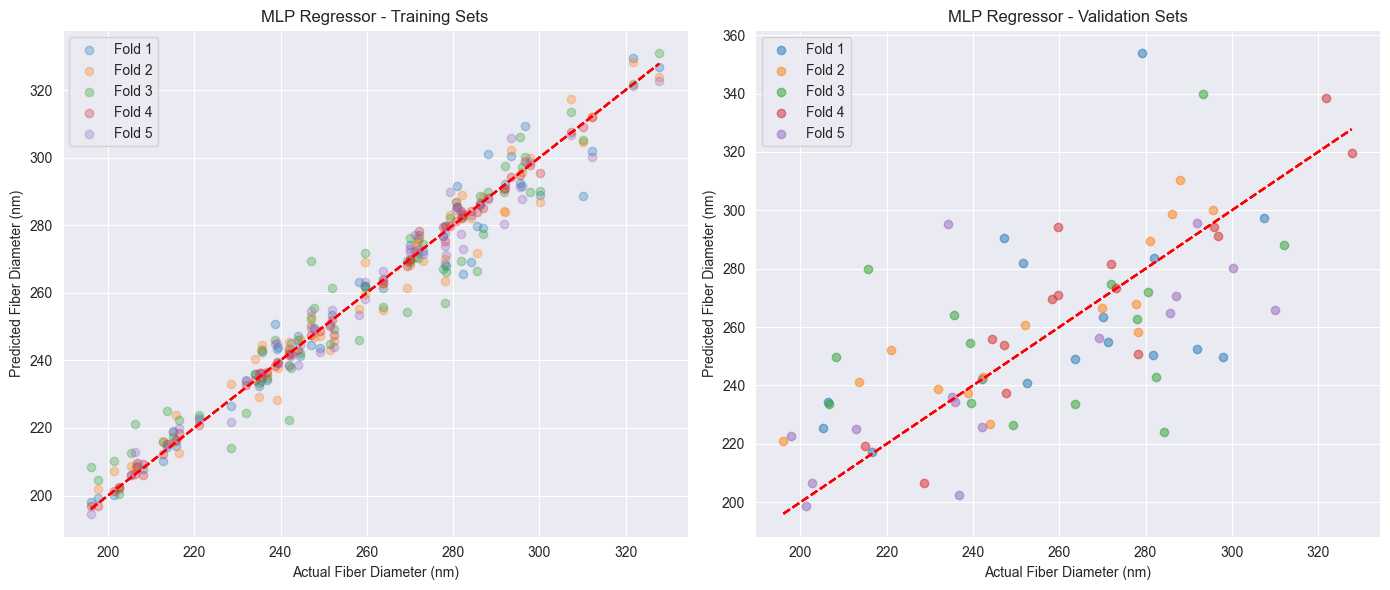


📊 MLP Regressor FINAL RESULTS:
RMSE (val): 24.2482 ± 7.5037
MAE  (val): 19.2455
R²   (val): 0.3578

🔁 Nested CV with visualization: XGBoost

▶ OUTER FOLD 1
✅ Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}

▶ OUTER FOLD 2
✅ Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}

▶ OUTER FOLD 3
✅ Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}

▶ OUTER FOLD 4
✅ Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}

▶ OUTER FOLD 5
✅ Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}


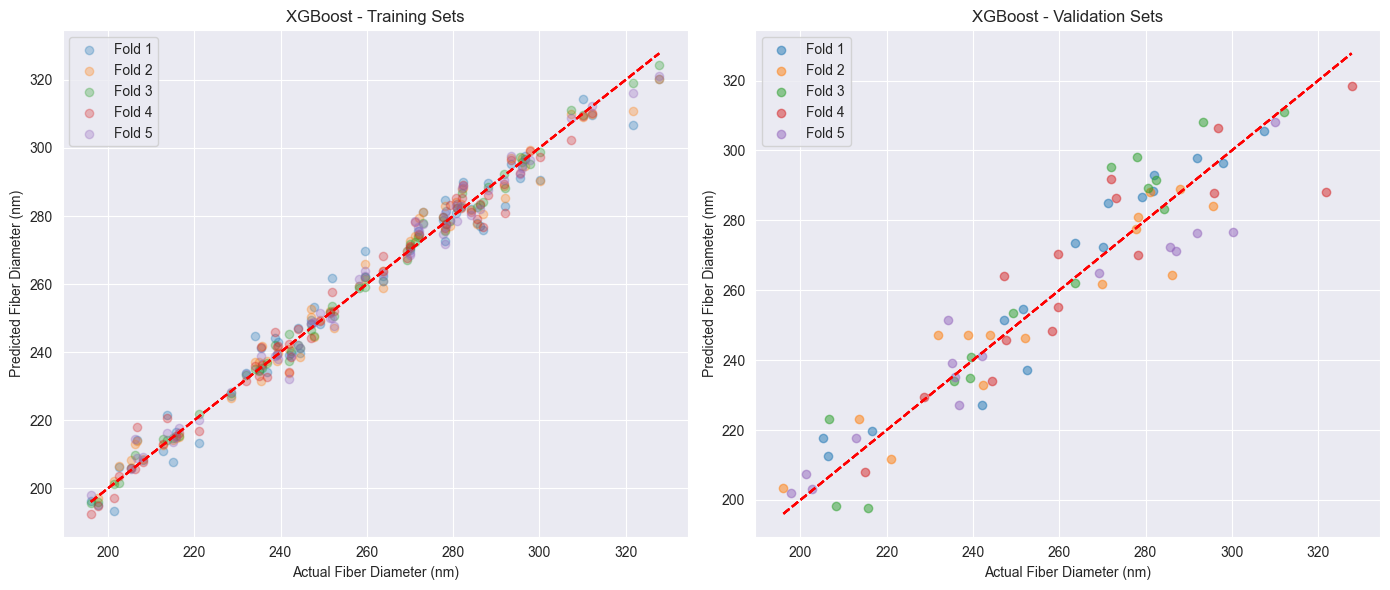


📊 XGBoost FINAL RESULTS:
RMSE (val): 10.8888 ± 1.6157
MAE  (val): 8.7536
R²   (val): 0.8786


In [31]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

results = {}

for model_name, (base_model, param_grid) in param_grids.items():
    print(f"\n🔁 Nested CV with visualization: {model_name}")

    rmse_train, mae_train, r2_train = [], [], []
    rmse_val, mae_val, r2_val = [], [], []

    best_params_outer = []

    plt.figure(figsize=(14, 6))

    for fold, (train_idx, val_idx) in enumerate(outer_cv.split(X), 1):
        print(f"\n▶ OUTER FOLD {fold}")

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # INNER LOOP: GRID SEARCH
        grid = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            scoring="neg_root_mean_squared_error",
            cv=inner_cv,
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        best_params_outer.append(grid.best_params_)
        print("✅ Best Params:", grid.best_params_)

        # Train final model for this fold
        best_model.fit(X_train, y_train)

        # Predict
        y_train_pred = best_model.predict(X_train)
        y_val_pred = best_model.predict(X_val)

        # Metrics
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        r2_train.append(r2_score(y_train, y_train_pred))

        rmse_val.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
        mae_val.append(mean_absolute_error(y_val, y_val_pred))
        r2_val.append(r2_score(y_val, y_val_pred))

        min_val = min(y.min(), y.min())
        max_val = max(y.max(), y.max())

        # PLOTS (same style, same logic, nested-safe)

        plt.subplot(1, 2, 1)
        plt.scatter(y_train, y_train_pred, alpha=0.3, label=f'Fold {fold}')
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        plt.xlabel('Actual Fiber Diameter (nm)')
        plt.ylabel('Predicted Fiber Diameter (nm)')
        plt.title(f'{model_name} - Training Sets')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.scatter(y_val, y_val_pred, alpha=0.5, label=f'Fold {fold}')
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        plt.xlabel('Actual Fiber Diameter (nm)')
        plt.ylabel('Predicted Fiber Diameter (nm)')
        plt.title(f'{model_name} - Validation Sets')
        plt.grid(True)


    plt.subplot(1, 2, 1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # SAVE RESULTS EXACTLY LIKE YOU DID
    results[model_name] = {
        'Best_Params': best_params_outer,
        'RMSE_train_folds': rmse_train,
        'MAE_train_folds': mae_train,
        'R2_train_folds': r2_train,
        'RMSE_val_folds': rmse_val,
        'MAE_val_folds': mae_val,
        'R2_val_folds': r2_val,
        'RMSE_train_avg': np.mean(rmse_train),
        'MAE_train_avg': np.mean(mae_train),
        'R2_train_avg': np.mean(r2_train),
        'RMSE_val_avg': np.mean(rmse_val),
        'MAE_val_avg': np.mean(mae_val),
        'R2_val_avg': np.mean(r2_val),
    }

    print(f"\n📊 {model_name} FINAL RESULTS:")
    print(f"RMSE (val): {np.mean(rmse_val):.4f} ± {np.std(rmse_val):.4f}")
    print(f"MAE  (val): {np.mean(mae_val):.4f}")
    print(f"R²   (val): {np.mean(r2_val):.4f}")


In [35]:

rows = []
for model_name, metrics in results.items():
    row = {
        'Model': model_name,

        # Train metrics (avg and std)
        'RMSE_Train_Avg': metrics['RMSE_train_avg'],
        'RMSE_Train_Std': np.std(metrics['RMSE_train_folds']),

        'MAE_Train_Avg': metrics['MAE_train_avg'],
        'MAE_Train_Std': np.std(metrics['MAE_train_folds']),

        'R2_Train_Avg': metrics['R2_train_avg'],
        'R2_Train_Std': np.std(metrics['R2_train_folds']),

        # Validation metrics (avg and std)
        'RMSE_Val_Avg': metrics['RMSE_val_avg'],
        'RMSE_Val_Std': np.std(metrics['RMSE_val_folds']),

        'MAE_Val_Avg': metrics['MAE_val_avg'],
        'MAE_Val_Std': np.std(metrics['MAE_val_folds']),

        'R2_Val_Avg': metrics['R2_val_avg'],
        'R2_Val_Std': np.std(metrics['R2_val_folds']),
    }
    rows.append(row)

results_df = pd.DataFrame(rows)
results_df.set_index('Model', inplace=True)
results_df

,RMSE_Train_Avg,RMSE_Train_Std,MAE_Train_Avg,MAE_Train_Std,R2_Train_Avg,R2_Train_Std,RMSE_Val_Avg,RMSE_Val_Std,MAE_Val_Avg,MAE_Val_Std,R2_Val_Avg,R2_Val_Std
Model,,,,,,,,,,,,
Linear Regression,19.778015,1.034397,16.559536,0.998117,0.628574,0.025685,20.916393,4.002557,17.823694,3.531384,0.561831,0.125530
Ridge Regression,19.921043,0.930290,16.723018,0.928255,0.623117,0.023694,21.098156,4.232281,17.869872,3.924223,0.554780,0.128848
Lasso Regression,19.890268,1.022900,16.754869,0.945185,0.624353,0.025361,20.780183,4.100183,17.668863,3.860145,0.570053,0.114408
ElasticNet,20.460262,0.809207,17.274450,0.834863,0.602281,0.023280,21.263864,4.378834,18.179246,4.042792,0.551155,0.119083
Decision Tree,11.312132,7.348073,8.815413,5.952354,0.825999,0.137445,17.985312,2.738979,14.516882,3.660457,0.677657,0.066815
Random Forest,5.137442,0.394080,4.003372,0.271866,0.974772,0.003877,12.422614,3.165814,9.780848,2.705396,0.841253,0.073849
Gradient Boosting,2.988644,0.785116,2.310966,0.601505,0.990862,0.004371,11.234867,1.231209,8.442808,0.626958,0.871418,0.033445
AdaBoost,10.281558,1.300570,8.614495,1.113099,0.897378,0.027650,13.910348,3.232309,11.159610,3.016585,0.807291,0.059824
KNN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.019462,1.845575,15.167452,1.646445,0.677598,0.039703


In [40]:
from scipy.stats import t
import numpy as np

n_folds = 5  # number of outer folds

def compute_ci(mean, std, n, confidence=0.95):
    t_val = t.ppf(1 - (1-confidence)/2, df=n-1)
    margin = t_val * (std / np.sqrt(n))
    return mean - margin, mean + margin

# Compute CI for each metric in results_df
for metric in ['RMSE_Train', 'MAE_Train', 'R2_Train',
               'RMSE_Val', 'MAE_Val', 'R2_Val']:

    ci_low = []
    ci_high = []

    for _, row in results_df.iterrows():
        mean = row[f'{metric}_Avg']
        std  = row[f'{metric}_Std']
        low, high = compute_ci(mean, std, n_folds)
        ci_low.append(low)
        ci_high.append(high)

    results_df[f'{metric}_CI_Low'] = ci_low
    results_df[f'{metric}_CI_High'] = ci_high

# Optional: display CI in a single column
def format_ci(mean, low, high):
    return f"{mean:.3f} [{low:.3f}, {high:.3f}]"

for metric in ['RMSE_Train', 'MAE_Train', 'R2_Train',
               'RMSE_Val', 'MAE_Val', 'R2_Val']:
    results_df[f'{metric}_Display'] = results_df.apply(
        lambda row: format_ci(row[f'{metric}_Avg'], row[f'{metric}_CI_Low'], row[f'{metric}_CI_High']),
        axis=1
    )

results_df


,RMSE_Train_Avg,RMSE_Train_Std,MAE_Train_Avg,MAE_Train_Std,R2_Train_Avg,R2_Train_Std,RMSE_Val_Avg,RMSE_Val_Std,MAE_Val_Avg,MAE_Val_Std,...,MAE_Val_CI_Low,MAE_Val_CI_High,R2_Val_CI_Low,R2_Val_CI_High,RMSE_Train_Display,MAE_Train_Display,R2_Train_Display,RMSE_Val_Display,MAE_Val_Display,R2_Val_Display
Model,,,,,,,,,,,,,,,,,,,,,
Linear Regression,19.778015,1.034397,16.559536,0.998117,0.628574,0.025685,20.916393,4.002557,17.823694,3.531384,...,13.438901,22.208487,0.405965,0.717698,"19.778 [18.494, 21.062]","16.560 [15.320, 17.799]","0.629 [0.597, 0.660]","20.916 [15.947, 25.886]","17.824 [13.439, 22.208]","0.562 [0.406, 0.718]"
Ridge Regression,19.921043,0.930290,16.723018,0.928255,0.623117,0.023694,21.098156,4.232281,17.869872,3.924223,...,12.997306,22.742438,0.394794,0.714767,"19.921 [18.766, 21.076]","16.723 [15.570, 17.876]","0.623 [0.594, 0.653]","21.098 [15.843, 26.353]","17.870 [12.997, 22.742]","0.555 [0.395, 0.715]"
Lasso Regression,19.890268,1.022900,16.754869,0.945185,0.624353,0.025361,20.780183,4.100183,17.668863,3.860145,...,12.875861,22.461866,0.427996,0.712109,"19.890 [18.620, 21.160]","16.755 [15.581, 17.928]","0.624 [0.593, 0.656]","20.780 [15.689, 25.871]","17.669 [12.876, 22.462]","0.570 [0.428, 0.712]"
ElasticNet,20.460262,0.809207,17.274450,0.834863,0.602281,0.023280,21.263864,4.378834,18.179246,4.042792,...,13.159458,23.199035,0.403294,0.699017,"20.460 [19.455, 21.465]","17.274 [16.238, 18.311]","0.602 [0.573, 0.631]","21.264 [15.827, 26.701]","18.179 [13.159, 23.199]","0.551 [0.403, 0.699]"
Decision Tree,11.312132,7.348073,8.815413,5.952354,0.825999,0.137445,17.985312,2.738979,14.516882,3.660457,...,9.971825,19.061939,0.594695,0.760620,"11.312 [2.188, 20.436]","8.815 [1.425, 16.206]","0.826 [0.655, 0.997]","17.985 [14.584, 21.386]","14.517 [9.972, 19.062]","0.678 [0.595, 0.761]"
Random Forest,5.137442,0.394080,4.003372,0.271866,0.974772,0.003877,12.422614,3.165814,9.780848,2.705396,...,6.421655,13.140041,0.749557,0.932948,"5.137 [4.648, 5.627]","4.003 [3.666, 4.341]","0.975 [0.970, 0.980]","12.423 [8.492, 16.353]","9.781 [6.422, 13.140]","0.841 [0.750, 0.933]"
Gradient Boosting,2.988644,0.785116,2.310966,0.601505,0.990862,0.004371,11.234867,1.231209,8.442808,0.626958,...,7.664336,9.221279,0.829891,0.912945,"2.989 [2.014, 3.963]","2.311 [1.564, 3.058]","0.991 [0.985, 0.996]","11.235 [9.706, 12.764]","8.443 [7.664, 9.221]","0.871 [0.830, 0.913]"
AdaBoost,10.281558,1.300570,8.614495,1.113099,0.897378,0.027650,13.910348,3.232309,11.159610,3.016585,...,7.414025,14.905196,0.733010,0.881572,"10.282 [8.667, 11.896]","8.614 [7.232, 9.997]","0.897 [0.863, 0.932]","13.910 [9.897, 17.924]","11.160 [7.414, 14.905]","0.807 [0.733, 0.882]"
KNN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.019462,1.845575,15.167452,1.646445,...,13.123121,17.211783,0.628301,0.726896,"0.000 [0.000, 0.000]","0.000 [0.000, 0.000]","1.000 [1.000, 1.000]","18.019 [15.728, 20.311]","15.167 [13.123, 17.212]","0.678 [0.628, 0.727]"


In [36]:
best_params_rows = []
for model_name, metrics in results.items():
    best_params_rows.append({
        'Model': model_name,
        'Best_Params': metrics['Best_Params']
    })

best_params_df = pd.DataFrame(best_params_rows)
best_params_df.set_index('Model', inplace=True)

print("\n🔧 Best Hyperparameters Table:")
print(best_params_df)




🔧 Best Hyperparameters Table:
                                                         Best_Params
Model                                                               
Linear Regression                               [{}, {}, {}, {}, {}]
Ridge Regression   [{'model__alpha': 1}, {'model__alpha': 1}, {'m...
Lasso Regression   [{'model__alpha': 1}, {'model__alpha': 1}, {'m...
ElasticNet         [{'model__alpha': 1, 'model__l1_ratio': 0.9}, ...
Decision Tree      [{'max_depth': 3, 'min_samples_leaf': 8, 'min_...
Random Forest      [{'max_depth': None, 'max_features': 'sqrt', '...
Gradient Boosting  [{'learning_rate': 0.2, 'max_depth': 3, 'min_s...
AdaBoost           [{'learning_rate': 1, 'n_estimators': 300}, {'...
KNN                [{'model__n_neighbors': 5, 'model__p': 2, 'mod...
MLP Regressor      [{'model__activation': 'relu', 'model__alpha':...
XGBoost            [{'colsample_bytree': 0.6, 'learning_rate': 0....


In [37]:
print(results_df)

                   RMSE_Train_Avg  RMSE_Train_Std  MAE_Train_Avg  \
Model                                                              
Linear Regression       19.778015        1.034397      16.559536   
Ridge Regression        19.921043        0.930290      16.723018   
Lasso Regression        19.890268        1.022900      16.754869   
ElasticNet              20.460262        0.809207      17.274450   
Decision Tree           11.312132        7.348073       8.815413   
Random Forest            5.137442        0.394080       4.003372   
Gradient Boosting        2.988644        0.785116       2.310966   
AdaBoost                10.281558        1.300570       8.614495   
KNN                      0.000000        0.000000       0.000000   
MLP Regressor            5.547397        2.329023       4.200690   
XGBoost                  3.929332        1.110819       3.048481   

                   MAE_Train_Std  R2_Train_Avg  R2_Train_Std  RMSE_Val_Avg  \
Model                                

In [38]:
final_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42, objective="reg:squarederror"),
    param_grid=param_grids["XGBoost"][1],
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

final_grid.fit(X, y)

best_xgb = final_grid.best_estimator_

print("✅ FINAL XGBoost hyperparameters:", final_grid.best_params_)


✅ FINAL XGBoost hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
